<a href="https://colab.research.google.com/github/roquearmas/pruebasIA/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CLASIFICADOR NAIVE BAYES***

In [ ]:
# Se importan las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

Se carga el dataset

In [ ]:
data = pd.read_csv("house-votes-84.data", header=None, names=["NAME", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16"])

# Eliminamos los datos vacíos
data = data.replace("?", "")

# Convertimos la columna NAME a factor
data["NAME"] = data["NAME"].astype("category")

# Dividimos el dataset en entrenamiento y test
train_data = data.iloc[:370]
test_data = data.iloc[371:435]

In [ ]:
# Entrenamos el clasificador
model = GaussianNB()

x_train=train_data.iloc[:,1:].replace("y", 1).replace("n", 0).replace("", 0)
y_train=train_data.iloc[:,0].replace("democrat",0).replace("republican",1)
x_test= test_data.iloc[:,1:].replace("y", 1).replace("n", 0).replace("", 0)
y_test= test_data.iloc[:,0].replace("democrat",0).replace("republican",1)

#model.fit(train_data.drop("NAME", axis=1), train_data["NAME"])
model.fit (x_train, y_train)

# Predecimos las clases
predictions = model.predict(x_test)

# Matriz de confusión
confusion_matrix(y_test, predictions)

# Accuracy
accuracy_score(y_test, predictions)

# Precision
precision_score(y_test, predictions)

# Recall
recall_score(y_test, predictions)

# F1
f1_score(y_test, predictions)

0.8679245283018867

Curva ROC

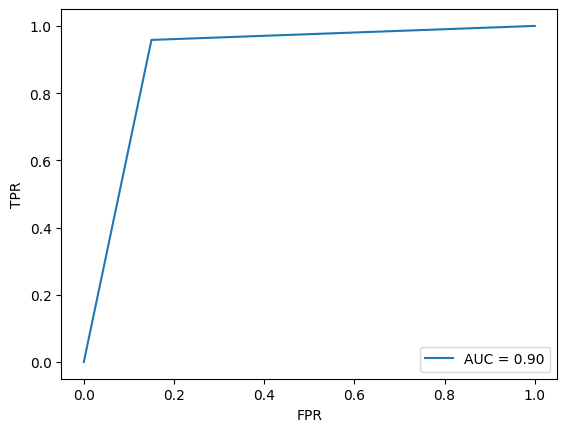

In [ ]:
fpr, tpr, _ = roc_curve(y_test, predictions)
area = auc(fpr, tpr)
plt.plot(fpr, tpr, label="AUC = {0:.2f}".format(area))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()